Following notebook is a python project for Sentimental analysis of customers about food delivery companies (Swiggy, Zomato, etc.)

In [3]:
import sys
import re
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

Swiggy Data

In [4]:

#df = pd.read_excel (r'Path where the Excel file is stored\File name.xlsx')
df_1 = pd.read_excel (r'SwiggyCares_user_tweets.xlsx')
# adding an row_id field to the dataframe, which will be useful for joining later
df_1["row_id"] = df_1.index + 1
#print first 10 rows
print (df_1.head(10))

              Tweet Id                                               Text  \
0  1669348498058403840  @Shiv_Prajapati Hello Shiv, that shouldn't hav...   
1  1669347885480284163  @robiraG Thank you for sharing. As checked, we...   
2  1669347404506869777  @XenaTweet Thanks for allowing us time to chec...   
3  1669346629743435778  @nk1676 Your order has been delivered. Please ...   
4  1669346466756976642  @Areweevee We are with you in DM to assist. Ha...   
5  1669345665082875907  @pmearthy Hi Prakhar, our team has reached out...   
6  1669345407917490177  @batlamobeen Thank you for your patience. Plea...   
7  1669345330763296768  @zoshuuun Our team had reached out to you over...   
8  1669345311205257217  @akhileshnair08  Hi Akhilesh, Please allow us ...   
9  1669345197443121154  @aslam16061997 No worries, we will have the is...   

           Name  Screen Name                       UTC  \
0  Swiggy Cares  SwiggyCares  2023-06-15T14:17:51.000Z   
1  Swiggy Cares  SwiggyCares  2023-0

In [5]:

#create a new data frame with "id" and "comment" fields
df_subset = df_1[['row_id', 'Text', 'Tweet Id']].copy()
#data clean-up
#remove all non-aphabet characters
df_subset['Text'] = df_subset['Text'].str.replace("[^a-zA-Z#]", " ")
#covert to lower-case
df_subset['Text'] = df_subset['Text'].str.casefold()
print (df_subset.head(10))

   row_id                                               Text  \
0       1   shiv prajapati hello shiv  that shouldn t hav...   
1       2   robirag thank you for sharing  as checked  we...   
2       3   xenatweet thanks for allowing us time to chec...   
3       4   nk     your order has been delivered  please ...   
4       5   areweevee we are with you in dm to assist  ha...   
5       6   pmearthy hi prakhar  our team has reached out...   
6       7   batlamobeen thank you for your patience  plea...   
7       8   zoshuuun our team had reached out to you over...   
8       9   akhileshnair    hi akhilesh  please allow us ...   
9      10   aslam         no worries  we will have the is...   

              Tweet Id  
0  1669348498058403840  
1  1669347885480284163  
2  1669347404506869777  
3  1669346629743435778  
4  1669346466756976642  
5  1669345665082875907  
6  1669345407917490177  
7  1669345330763296768  
8  1669345311205257217  
9  1669345197443121154  


<ipython-input-5-ebed7843f446>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df_subset['Text'] = df_subset['Text'].str.replace("[^a-zA-Z#]", " ")


In [6]:

# set up empty dataframe for staging output
df1=pd.DataFrame()
df1['row_id']=['99999999999']
df1['sentiment_type']='NA999NA'
df1['sentiment_score']=0

In [7]:

print('Processing sentiment analysis...')
sid = SentimentIntensityAnalyzer()
t_df = df1
for index, row in df_subset.iterrows():
    scores = sid.polarity_scores(row[1])
    for key, value in scores.items():
        temp = [key,value,row[0]]
        df1['row_id']=row[0]
        df1['sentiment_type']=key
        df1['sentiment_score']=value
        t_df = pd.concat([t_df, df1], ignore_index=True)
#remove dummy row with row_id = 99999999999
t_df_cleaned = t_df[t_df.row_id != '99999999999']
#remove duplicates if any exist
t_df_cleaned = t_df_cleaned.drop_duplicates()
# only keep rows where sentiment_type = compound
t_df_cleaned = t_df[t_df.sentiment_type == 'compound']
print(t_df_cleaned.head(10))

Processing sentiment analysis...
    row_id sentiment_type  sentiment_score
4        1       compound           0.5423
8        2       compound           0.8360
12       3       compound           0.8402
16       4       compound           0.6908
20       5       compound           0.0000
24       6       compound           0.4019
28       7       compound           0.1779
32       8       compound           0.8176
36       9       compound           0.4939
40      10       compound          -0.4019


In [8]:

#merge dataframes
df_output1 = pd.merge(df_1, t_df_cleaned, on='row_id', how='inner')
print(df_output1.head(10))

              Tweet Id                                               Text  \
0  1669348498058403840  @Shiv_Prajapati Hello Shiv, that shouldn't hav...   
1  1669347885480284163  @robiraG Thank you for sharing. As checked, we...   
2  1669347404506869777  @XenaTweet Thanks for allowing us time to chec...   
3  1669346629743435778  @nk1676 Your order has been delivered. Please ...   
4  1669346466756976642  @Areweevee We are with you in DM to assist. Ha...   
5  1669345665082875907  @pmearthy Hi Prakhar, our team has reached out...   
6  1669345407917490177  @batlamobeen Thank you for your patience. Plea...   
7  1669345330763296768  @zoshuuun Our team had reached out to you over...   
8  1669345311205257217  @akhileshnair08  Hi Akhilesh, Please allow us ...   
9  1669345197443121154  @aslam16061997 No worries, we will have the is...   

           Name  Screen Name                       UTC  \
0  Swiggy Cares  SwiggyCares  2023-06-15T14:17:51.000Z   
1  Swiggy Cares  SwiggyCares  2023-0

In [9]:

df_output1[["sentiment_score"]].describe()

,sentiment_score
count,3200.000000
mean,0.360949
std,0.366961
min,-0.851800
25%,0.025800
50%,0.421500
75%,0.648600
max,0.960700


Zomato Data

In [10]:
#df = pd.read_excel (r'Path where the Excel file is stored\File name.xlsx')
df = pd.read_excel (r'zomatocare_user_tweets.xlsx')
# adding an row_id field to the dataframe, which will be useful for joining later
df["row_id"] = df.index + 1
#print first 10 rows
print (df.head(10))

              Tweet Id                                               Text  \
0  1669349302681112582  @pranavpanwar17 The resolution for your stated...   
1  1669348684532957184  @sanjays65872769 Hi Sanjay , we regret the inc...   
2  1669347514661896193  @amit84925059864 Hi Amit, we understand your c...   
3  1669347332671049731  @Gohan79751891 Hi Gohan, we've shared the reso...   
4  1669347155683966979  @JayantaGho99241 Hi Jayanta, sad to hear about...   
5  1669346861885554688  @pranavvgautam The resolution for your stated ...   
6  1669346850045046787  @tanujgahlot007 Hi Tanuj, we've shared the res...   
7  1669346395252473857  @sacredfeminity Hi there, we understand this c...   
8  1669345479417802760  @KohliDeepraj Hi Deepraj, we understand your a...   
9  1669345437529305089  @hiteshgarg72641 The resolution for your state...   

          Name Screen Name                       UTC  \
0  zomato care  zomatocare  2023-06-15T14:21:03.000Z   
1  zomato care  zomatocare  2023-06-15T1

In [11]:
#create a new data frame with "id" and "comment" fields
df_subset = df[['row_id', 'Text', 'Tweet Id']].copy()
#data clean-up
#remove all non-aphabet characters
df_subset['Text'] = df_subset['Text'].str.replace("[^a-zA-Z#]", " ")
#covert to lower-case
df_subset['Text'] = df_subset['Text'].str.casefold()
print (df_subset.head(10))

   row_id                                               Text  \
0       1   pranavpanwar   the resolution for your stated...   
1       2   sanjays         hi sanjay   we regret the inc...   
2       3   amit            hi amit  we understand your c...   
3       4   gohan         hi gohan  we ve shared the reso...   
4       5   jayantagho      hi jayanta  sad to hear about...   
5       6   pranavvgautam the resolution for your stated ...   
6       7   tanujgahlot    hi tanuj  we ve shared the res...   
7       8   sacredfeminity hi there  we understand this c...   
8       9   kohlideepraj hi deepraj  we understand your a...   
9      10   hiteshgarg      the resolution for your state...   

              Tweet Id  
0  1669349302681112582  
1  1669348684532957184  
2  1669347514661896193  
3  1669347332671049731  
4  1669347155683966979  
5  1669346861885554688  
6  1669346850045046787  
7  1669346395252473857  
8  1669345479417802760  
9  1669345437529305089  


<ipython-input-11-366c11092932>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df_subset['Text'] = df_subset['Text'].str.replace("[^a-zA-Z#]", " ")


In [12]:
# set up empty dataframe for staging output
df2=pd.DataFrame()
df2['row_id']=['99999999999']
df2['sentiment_type']='NA999NA'
df2['sentiment_score']=0

In [13]:
print('Processing sentiment analysis...')
sid = SentimentIntensityAnalyzer()
t_df = df2
for index, row in df_subset.iterrows():
    scores = sid.polarity_scores(row[1])
    for key, value in scores.items():
        temp = [key,value,row[0]]
        df2['row_id']=row[0]
        df2['sentiment_type']=key
        df2['sentiment_score']=value
        t_df = pd.concat([t_df, df2], ignore_index=True)
#remove dummy row with row_id = 99999999999
t_df_cleaned = t_df[t_df.row_id != '99999999999']
#remove duplicates if any exist
t_df_cleaned = t_df_cleaned.drop_duplicates()
# only keep rows where sentiment_type = compound
t_df_cleaned = t_df[t_df.sentiment_type == 'compound']
print(t_df_cleaned.head(10))

Processing sentiment analysis...
    row_id sentiment_type  sentiment_score
4        1       compound           0.7506
8        2       compound          -0.2023
12       3       compound           0.8689
16       4       compound           0.7906
20       5       compound           0.1027
24       6       compound           0.7506
28       7       compound           0.7906
32       8       compound           0.1027
36       9       compound          -0.1280
40      10       compound           0.7506


In [14]:
#merge dataframes
df_output2 = pd.merge(df, t_df_cleaned, on='row_id', how='inner')
print(df_output2.head(10))

              Tweet Id                                               Text  \
0  1669349302681112582  @pranavpanwar17 The resolution for your stated...   
1  1669348684532957184  @sanjays65872769 Hi Sanjay , we regret the inc...   
2  1669347514661896193  @amit84925059864 Hi Amit, we understand your c...   
3  1669347332671049731  @Gohan79751891 Hi Gohan, we've shared the reso...   
4  1669347155683966979  @JayantaGho99241 Hi Jayanta, sad to hear about...   
5  1669346861885554688  @pranavvgautam The resolution for your stated ...   
6  1669346850045046787  @tanujgahlot007 Hi Tanuj, we've shared the res...   
7  1669346395252473857  @sacredfeminity Hi there, we understand this c...   
8  1669345479417802760  @KohliDeepraj Hi Deepraj, we understand your a...   
9  1669345437529305089  @hiteshgarg72641 The resolution for your state...   

          Name Screen Name                       UTC  \
0  zomato care  zomatocare  2023-06-15T14:21:03.000Z   
1  zomato care  zomatocare  2023-06-15T1

In [15]:
df_output2[["sentiment_score"]].describe()

,sentiment_score
count,3192.000000
mean,0.412138
std,0.393373
min,-0.840200
25%,0.051600
50%,0.542300
75%,0.750600
max,0.959300


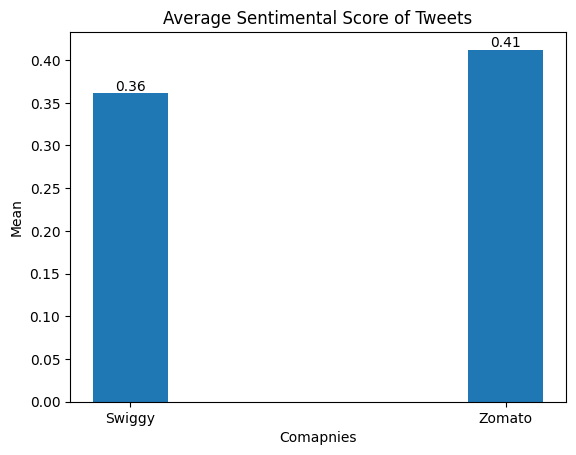

In [16]:

# Calculate the mean values of df_output1 and df_output2 for the selected columns
mean_df1 = df_output1[["sentiment_score"]].mean().values[0]
mean_df2 = df_output2[["sentiment_score"]].mean().values[0]

# Create a bar plot
plt.bar(['Swiggy', 'Zomato'], [mean_df1, mean_df2], width = 0.2)

# Add labels and title
plt.xlabel('Comapnies')
plt.ylabel('Mean')
plt.title('Average Sentimental Score of Tweets')

for i, value in enumerate([mean_df1, mean_df2]):
    plt.text(i, value, str(round(value, 2)), ha='center', va='bottom')

# Display the plot
plt.show()